In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read dataset
df=pd.read_csv('/kaggle/input/car-data/Car_Hacking_5.csv.xls')

In [3]:
df

,CAN ID,Engine Speed (RPM),Vehical Speed,Engine Temperature,Brake Status,Fuel Level,Temperature Readings,Control,Status Flag,Label
0,1201,41,39,39,35,0,0,0,154,R
1,809,64,187,127,20,17,32,0,20,R
2,1349,216,0,0,136,0,0,0,0,R
3,1201,41,39,39,35,0,0,0,154,R
4,2,0,0,0,0,0,3,2,228,R
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,R
818436,1088,255,0,0,0,255,134,9,0,R
818437,848,5,32,100,104,117,0,0,92,R
818438,1349,216,90,0,137,0,0,0,0,R


In [4]:
# The labels of the dataset. "R" indicates normal patterns, and there are four types of attack (DoS, fuzzy. gear spoofing, and RPM spoofing zttacks)
df.Label.value_counts()

Label
R        701832
RPM       32539
gear      29944
DoS       29501
Fuzzy     24624
Name: count, dtype: int64

In [5]:
# Transform all features into the scale of [0,1]
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [6]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [7]:
df.describe()

,CAN ID,Engine Speed (RPM),Vehical Speed,Engine Temperature,Brake Status,Fuel Level,Temperature Readings,Control,Status Flag
count,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000
mean,127.238714,114.795941,108.542651,89.635689,109.592301,106.303631,113.276970,84.693261,93.580468
std,74.243928,90.581225,93.854431,100.609836,103.493334,96.006801,91.614427,101.097746,100.526948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.728228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121.884384,128.138138,115.758258,0.000000,129.542042,129.924925,131.328829,0.000000,0.000000
75%,190.675676,194.504505,194.759760,198.971471,189.782282,193.866366,192.462462,191.696697,191.824324
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

In [9]:
# Generate 9*9 color images for class 0 (Normal)
# Change the numbers 9 to the number of features n in your dataset if you use a different dataset, reshape(n,n,3)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):  
    count=count+1
    if count<=27: 
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [10]:
# Generate 9*9 color images for class 1 (RPM spoofing)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):  
    count=count+1
    if count<=27: 
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [11]:
# Generate 9*9 color images for class 2 (Gear spoofing)
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path)

for i in range(0, len(df2)):  
    count=count+1
    if count<=27: 
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [12]:
# Generate 9*9 color images for class 3 (DoS attack)
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path)


for i in range(0, len(df3)):  
    count=count+1
    if count<=27: 
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [13]:
# Generate 9*9 color images for class 4 (Fuzzy attack)
count=0
ims = []

image_path = "train/4/"
os.makedirs(image_path)


for i in range(0, len(df4)):  
    count=count+1
    if count<=27: 
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

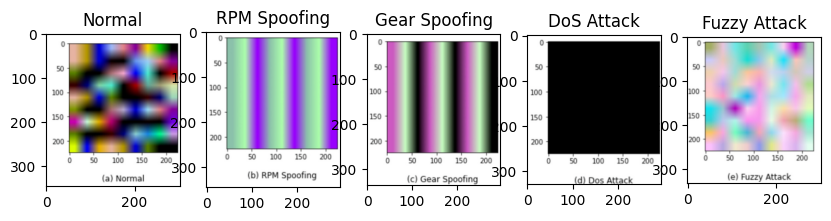

In [14]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('/kaggle/input/images1/normal.png')
img2 = Image.open('/kaggle/input/images1/rpm.png')
img3 = Image.open('/kaggle/input/images1/gear.png')
img4 = Image.open('/kaggle/input/images1/dos.png')
img5 = Image.open('/kaggle/input/images1/fuzzy.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  # display it

In [15]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

29228


In [16]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          
        #print ("move %s -> %s"%(srcfile,dstfile))

In [17]:
# The size of test set
Numbers

5845

In [18]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [19]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [20]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [21]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


In [22]:
import os
import tensorflow
import tensorflow.keras
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import  ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [23]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

# Define constants
TARGET_SIZE = (224, 224)
INPUT_SIZE = (224, 224, 3)
BATCHSIZE = 128  # You can try 128 or 32

# Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate training images
train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

# Generate validation images
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

# Debugging outputs
print("Class indices (training):", train_generator.class_indices)
sample_images, sample_labels = next(train_generator)
print("Sample image shape:", sample_images.shape)  # Should print (BATCHSIZE, 224, 224, 3)
print("Sample labels shape:", sample_labels.shape)  # Should print (BATCHSIZE, num_classes)


Found 23383 images belonging to 5 classes.
Found 5845 images belonging to 5 classes.
Class indices (training): {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
Sample image shape: (128, 224, 224, 3)
Sample labels shape: (128, 5)


In [24]:
for x_batch, y_batch in validation_generator:
    print(x_batch.shape, y_batch.shape)
    break  # just to print one batch


(128, 224, 224, 3) (128, 5)


In [25]:
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")


Number of training samples: 23383
Number of validation samples: 5845


In [26]:
# Check the shape of a batch from the training generator
for x_batch, y_batch in train_generator:
    print(f"Training batch X shape: {x_batch.shape}, Y shape: {y_batch.shape}")
    break  # Only print for one batch

# Check the shape of a batch from the validation generator
for x_batch, y_batch in validation_generator:
    print(f"Validation batch X shape: {x_batch.shape}, Y shape: {y_batch.shape}")
    break  # Only print for one batch


Training batch X shape: (128, 224, 224, 3), Y shape: (128, 5)
Validation batch X shape: (128, 224, 224, 3), Y shape: (128, 5)


In [27]:
steps_per_epoch = train_generator.samples // BATCHSIZE
validation_steps = validation_generator.samples // BATCHSIZE

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")


Steps per epoch: 182
Validation steps: 45


In [28]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}
    
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_accuracy'))
    
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))
    
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()


In [29]:
history_this= LossHistory()

In [30]:
def cnn_by_own(input_shape, num_class, epochs, train_generator, validation_generator, steps_per_epoch, validation_steps, savepath='./model_own.keras'):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(1, 1), input_shape=input_shape, padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_class, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    earlyStopping = kcallbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    
    hist = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=[earlyStopping, saveBestModel, history_this]  # Include history_this here
    )
    
    return hist  # Add this to return the training history


In [31]:
history_this = LossHistory()

Epoch 1/20


I0000 00:00:1729957245.128683      93 service.cc:145] XLA service 0x7c0ab0002d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729957245.128739      93 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729957245.128743      93 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-10-26 15:41:37.418833: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng2{k2=1,k3=0} for conv (f32[128,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,224,224]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-26 15:41:37.910225: E external/l

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8655 - loss: 0.4545
Epoch 1: val_accuracy improved from -inf to 0.99878, saving model to ./model_own.keras
182/182 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.8659 - loss: 0.4531 - val_accuracy: 0.9988 - val_loss: 0.0021
Epoch 2/20
  1/182 ━━━━━━━━━━━━━━━━━━━━ 3:13 1s/step - accuracy: 1.0000 - loss: 2.2456e-04
Epoch 2: val_accuracy improved from 0.99878 to 1.00000, saving model to ./model_own.keras
182/182 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 1.0000 - loss: 2.2456e-04 - val_accuracy: 1.0000 - val_loss: 1.7320e-04
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9937 - loss: 0.0327
Epoch 3: val_accuracy did not improve from 1.00000
182/182 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9938 - loss: 0.0326 - val_accuracy: 1.0000 - val_loss: 4.9519e-06
Epoch 4/20
  1/182 ━━━━━━━━━━━━━━━━━━━━ 3:14 1s/step - accuracy: 1.0000 - loss: 5.1954e-05
Epoch 4: val_accuracy did not improve from 1.00000
182/182 ━━━━

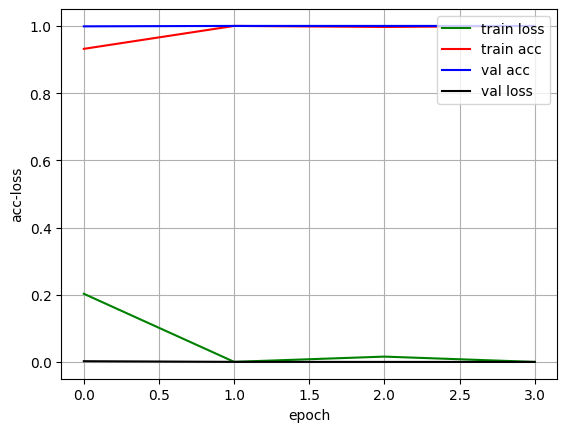

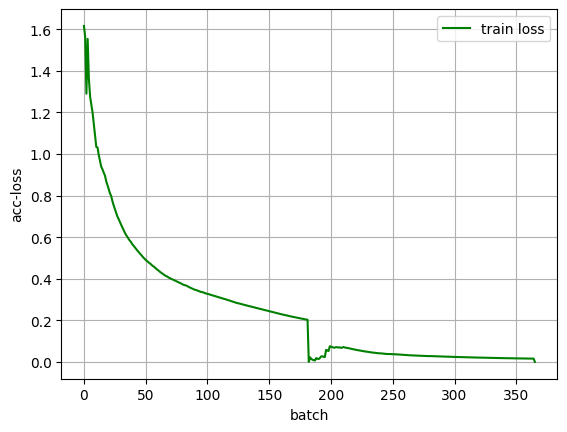

In [32]:
cnn_by_own(input_shape=INPUT_SIZE, num_class=5, epochs=20, 
           train_generator=train_generator, validation_generator=validation_generator, 
           steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
history_this.loss_plot('epoch')
history_this.loss_plot('batch')

Found 23383 images belonging to 5 classes.
Found 5845 images belonging to 5 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
730/730 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.9653 - loss: 0.1436
Epoch 1: val_accuracy improved from -inf to 0.97098, saving model to ./xception_model.keras
730/730 ━━━━━━━━━━━━━━━━━━━━ 416s 491ms/step - accuracy: 0.9653 - loss: 0.1435 - val_accuracy: 0.9710 - val_loss: 0.0669
Epoch 2/30
  1/730 ━━━━━━━━━━━━━━━━━━━━ 5:03 417ms/step - accuracy: 1.0000 - loss: 6.5091e-04
Epoch 2: val_accuracy did not improve from 0.97098
730/730 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 1.0000 - loss: 6.5091e-04 - val_accuracy: 0.9048 - val_loss: 0.1343
Epoch 3/30
730/730 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.9956 - loss: 0.0175
Epoch 3: val_accuracy improved from 0.97098 to 1.00000, saving model to ./xception_model.keras
730/730 ━━━━━━━━━━━━━━━━━━━━ 369s 447ms/step - accuracy: 0.9956 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss:

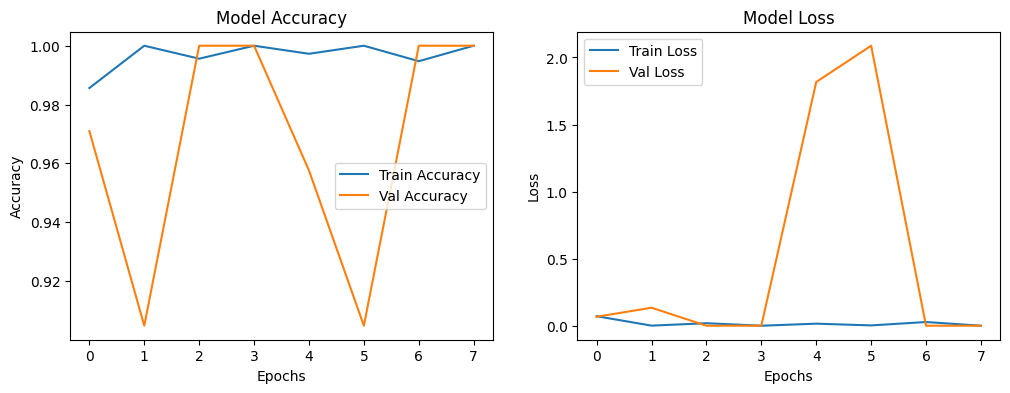

In [33]:
import numpy as np
import tensorflow as tf
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have train_generator and validation_generator already defined
# Create the augmented data generators
train_generator = train_datagen.flow_from_directory(
    './train_224/',  # Adjust this path as needed
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    './test_224/',  # Adjust this path as needed
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

def create_xception_model(input_shape, num_classes, savepath='./xception_model.keras'):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

    # Allow some layers to be trainable
    for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
        layer.trainable = True

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Define constants
INPUT_SIZE = (224, 224, 3)
NUM_CLASSES = 5
EPOCHS = 30  # Consider increasing the number of epochs

# Create the model
xception_model = create_xception_model(input_shape=INPUT_SIZE, num_classes=NUM_CLASSES)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')
model_checkpoint = ModelCheckpoint(filepath='./xception_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Fit the model
history = xception_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training history (optional)
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Call the plot function
plot_history(history)


In [34]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

# Assuming you have test data stored in a directory, similar to the train/validation sets
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './test_224/',  # Path to test data directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to ensure the order of images matches the predictions
)

# Load the best saved model
xception_model = tf.keras.models.load_model('./xception_model.keras')

# Calculate steps and cast to integer
steps = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Make predictions on the test set, including the last partial batch
predictions = xception_model.predict(test_generator, steps=steps)

# Convert the predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# True labels from the test generator
true_classes = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Confusion Matrix (optional for deeper insight)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)


Found 5845 images belonging to 5 classes.
183/183 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       1.00      1.00      1.00       258
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       223
           4       1.00      1.00      1.00       180

    accuracy                           1.00      5845
   macro avg       1.00      1.00      1.00      5845
weighted avg       1.00      1.00      1.00      5845

Confusion Matrix:
 [[4945    0    0    0    0]
 [   0  258    0    0    0]
 [   0    0  239    0    0]
 [   0    0    0  223    0]
 [   0    0    0    0  180]]


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8296 - loss: 1.2343
Epoch 1: val_accuracy improved from -inf to 0.85833, saving model to ./vgg16_optimized_model.keras
182/182 ━━━━━━━━━━━━━━━━━━━━ 128s 429ms/step - accuracy: 0.8299 - loss: 1.2324 - val_accuracy: 0.8583 - val_loss: 21.2508
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9268 - loss: 0.4876
Epoch 2: val_accuracy did not improve from 0.85833
182/182 ━━━━━━━━━━━━━━━━━━━━ 77s 421ms/step - accuracy: 0.9269 - loss: 0.4873 - val_accuracy: 0.8347 - val_loss: 54.6369
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9532 - loss: 0.3349
Epoch 3: val_accuracy improved from 0.85833 to 0.86597, saving model to ./vgg16_optimized_model.keras
182/182 ━━━━━━━━━━━━━━━━━━━━ 77s 426ms/step - accuracy: 0.9532 - loss: 0.3348 - val_accuracy: 0.8660 - val_loss: 1.3624
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.94

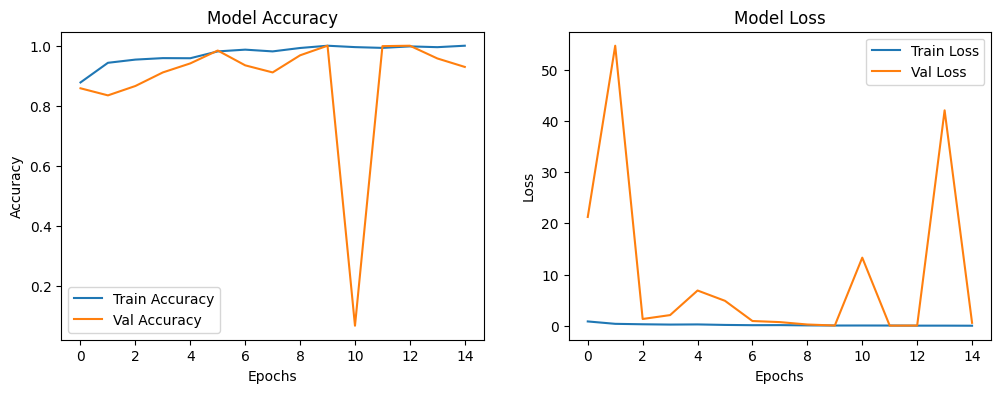

In [35]:
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

def create_vgg16_optimized(input_shape, num_classes, savepath='./vgg16_optimized_model.keras'):
    # Load the VGG16 model, excluding the top layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Unfreeze the last 4 VGG16 layers for fine-tuning
    for layer in base_model.layers[-4:]:
        layer.trainable = True

    # Create a new model on top of the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),  # Added Batch Normalization
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 Regularization
        Dropout(0.5),  # Dropout to prevent overfitting
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Constants
INPUT_SIZE = (224, 224, 3)  # Input size for VGG16
NUM_CLASSES = 5  # Number of classes in your dataset
EPOCHS = 20

# Create the optimized model
vgg16_optimized_model = create_vgg16_optimized(input_shape=INPUT_SIZE, num_classes=NUM_CLASSES)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')
model_checkpoint = ModelCheckpoint(filepath='./vgg16_optimized_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Fit the model
history = vgg16_optimized_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training history (optional)
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Call the plot function
plot_history(history)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 84s 419ms/step - accuracy: 0.8812 - loss: 0.9200 - val_accuracy: 0.9993 - val_loss: 0.2227
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 71s 390ms/step - accuracy: 0.9951 - loss: 0.2200 - val_accuracy: 1.0000 - val_loss: 0.1495
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 69s 380ms/step - accuracy: 0.9952 - loss: 0.1577 - val_accuracy: 1.0000 - val_loss: 0.1124
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 65s 361ms/step - accuracy: 0.9958 - loss: 0.1184 - val_accuracy: 1.0000 - val_loss: 0.0905
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0969 - val_accuracy: 1.0000 - val_loss: 0.0898
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 74s 393ms/step - accuracy: 0.9974 - loss: 0.0938 - val_accuracy: 1.0000 - val_loss: 0.0705
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 71s 393ms/step - accuracy: 0.9969 - loss: 0.0787 - val_accuracy: 1.0000 - val_loss: 0.0597


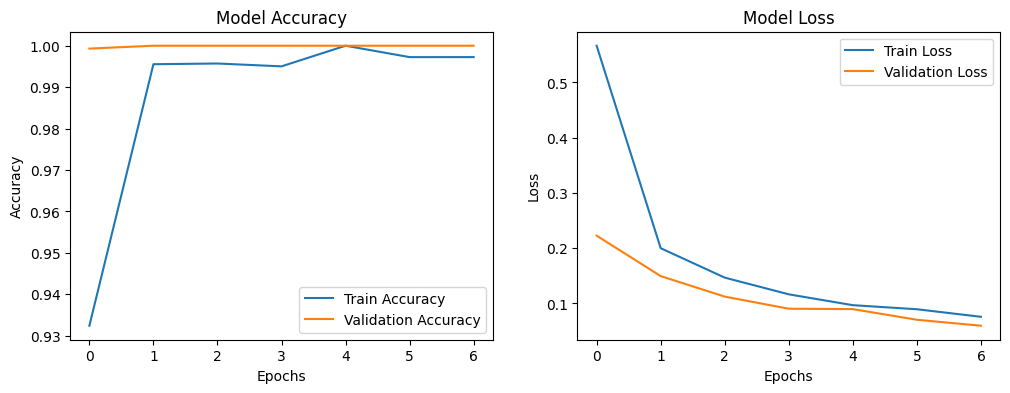

In [37]:
import tensorflow as tf
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

def create_vgg19_model(input_shape, num_classes, savepath='./vgg19_model.keras'):
    # Load the VGG19 model, excluding the top layers
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    # Create a new model on top of the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.5),  # Dropout for regularization
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Assuming train_generator and validation_generator are defined with train_datagen and validation_datagen
INPUT_SIZE = (224, 224, 3)  # Input size for VGG19
NUM_CLASSES = 5  # Adjust as per your dataset
EPOCHS = 20

# Create the model
vgg19_model = create_vgg19_model(input_shape=INPUT_SIZE, num_classes=NUM_CLASSES)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='./vgg19_model.keras', monitor='val_accuracy', save_best_only=True)

# Fit the model
history = vgg19_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)


Found 23383 images belonging to 5 classes.
Found 5845 images belonging to 5 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.8534 - loss: 0.8533
Epoch 1: val_accuracy improved from -inf to 0.84602, saving model to ./efficientnetb3_model.keras
731/731 ━━━━━━━━━━━━━━━━━━━━ 601s 732ms/step - accuracy: 0.8534 - loss: 0.8531 - val_accuracy: 0.8460 - val_loss: 0.6740
Epoch 2/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.8603 - loss: 0.6447
Epoch 2: val_accuracy did not improve from 0.84602
731/731 ━━━━━━━━━━━━━━━━━━━━ 481s 652ms/step - accuracy: 0.8603 - loss: 0.6447 - val_accuracy: 0.8460 - val_loss: 0.6582
Epoch 3/20
731/731 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.8661 - loss: 0.6063
Epoch 3: val_accuracy did not improve from 0.84602
731/731 ━━━━━━━━━━━━━━━━━━━━ 477s 647ms/step - accuracy: 0.8661 - loss: 0.6063 - val_accuracy: 0.8460 - val_loss: 0.6603
Epoch 4/20
731/731 ━━━━━━━━━━━━━━━━━━

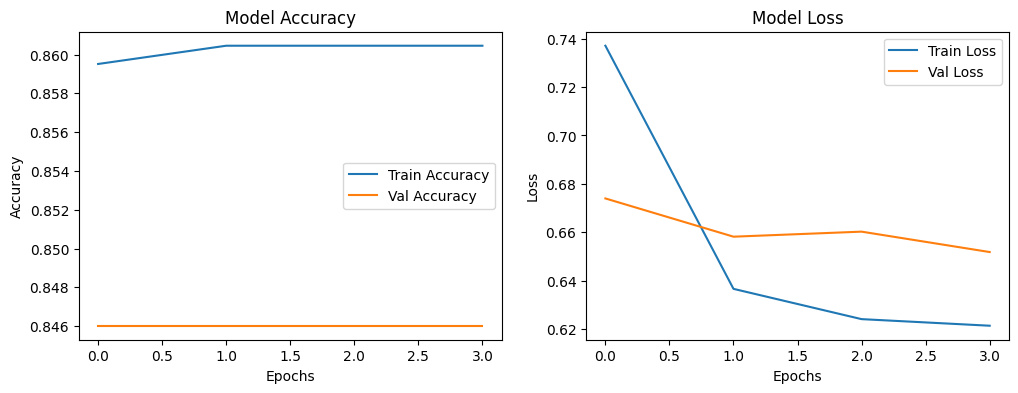

In [39]:
import tensorflow as tf
from keras.applications import EfficientNetB3
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model with EfficientNetB3 as the base
def create_efficientnet_model(input_shape, num_classes, savepath='./efficientnetb3_model.keras'):
    # Load the EfficientNetB3 model, excluding the top layers
    base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model
    base_model.trainable = False

    # Build the model on top of the base
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Define constants
INPUT_SIZE = (300, 300, 3)  # EfficientNetB3 typically uses 300x300 input size
NUM_CLASSES = 5  # Adjust based on your number of classes
EPOCHS = 20

# Data Augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Assuming train_generator and validation_generator are defined as below:
train_generator = train_datagen.flow_from_directory(
    './train_224',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    './test_224',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

# Create the EfficientNetB3 model
efficientnet_model = create_efficientnet_model(input_shape=INPUT_SIZE, num_classes=NUM_CLASSES)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max')
model_checkpoint = ModelCheckpoint(filepath='./efficientnetb3_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Fit the model
history = efficientnet_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training history (optional)
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Call the plot function
plot_history(history)


Found 5845 images belonging to 5 classes.
183/183 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step

Evaluation for CNN_Custom:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       0.96      1.00      0.98       258
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       223
           4       0.97      0.94      0.95       180

    accuracy                           1.00      5845
   macro avg       0.99      0.99      0.99      5845
weighted avg       1.00      1.00      1.00      5845



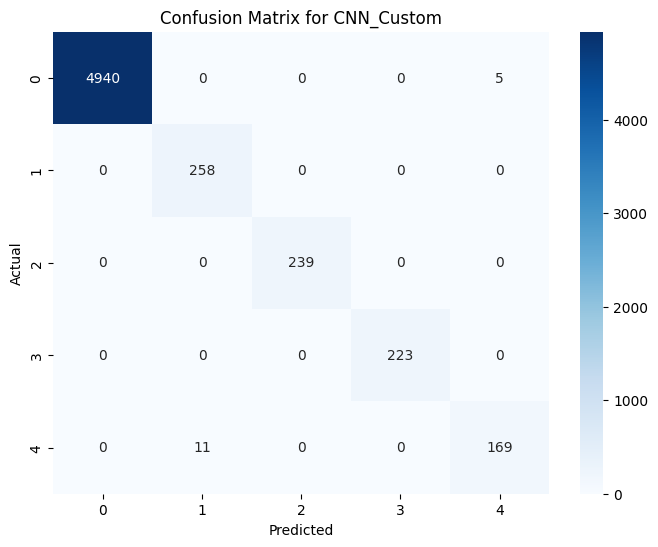

183/183 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step

Evaluation for Xception:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       1.00      1.00      1.00       258
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       223
           4       1.00      1.00      1.00       180

    accuracy                           1.00      5845
   macro avg       1.00      1.00      1.00      5845
weighted avg       1.00      1.00      1.00      5845



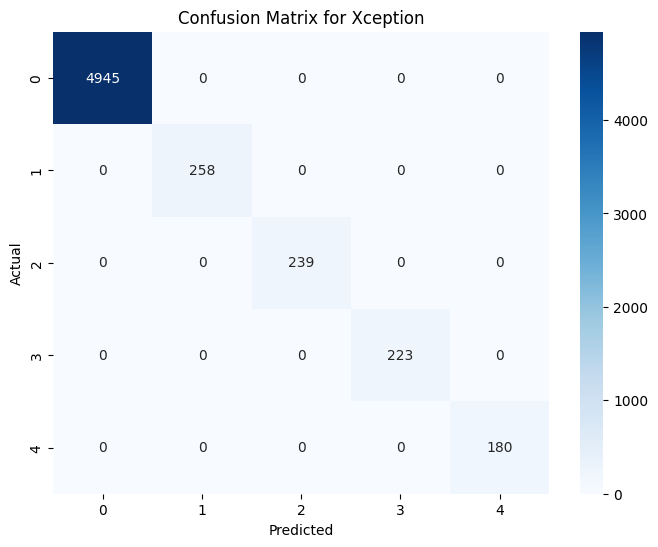

183/183 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step

Evaluation for VGG16_Optimized:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       0.93      1.00      0.96       258
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       223
           4       1.00      0.89      0.94       180

    accuracy                           1.00      5845
   macro avg       0.99      0.98      0.98      5845
weighted avg       1.00      1.00      1.00      5845



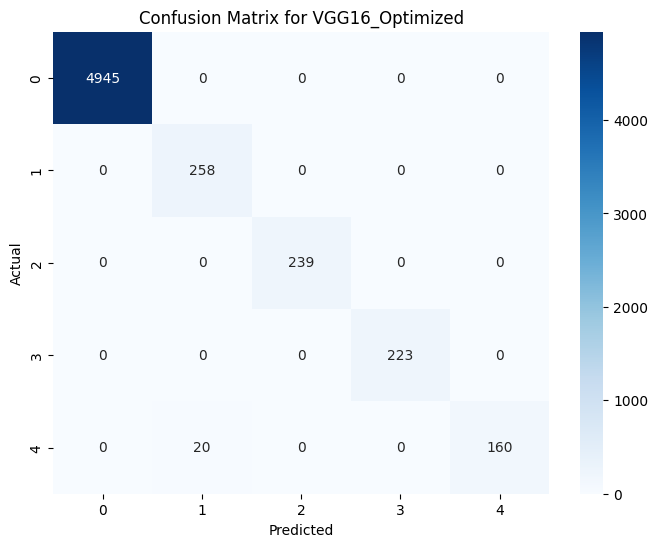

183/183 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step

Evaluation for VGG19:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       1.00      1.00      1.00       258
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       223
           4       1.00      0.98      0.99       180

    accuracy                           1.00      5845
   macro avg       1.00      1.00      1.00      5845
weighted avg       1.00      1.00      1.00      5845



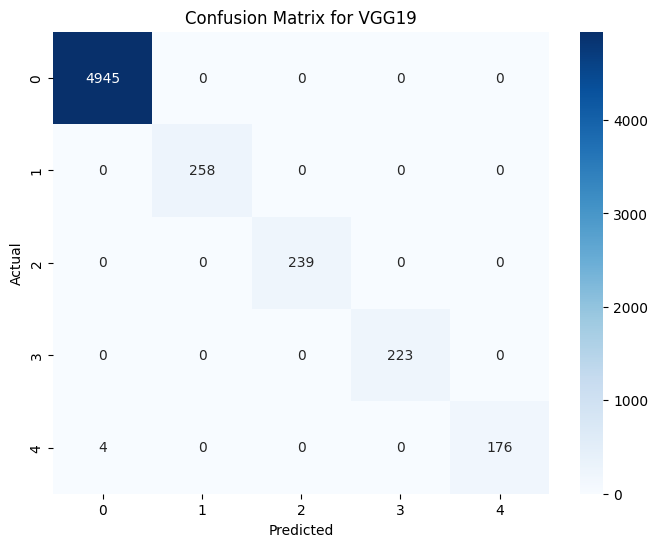

In [43]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of model file paths and their names
model_paths = {
    "CNN_Custom": './model_own.keras',
    "Xception": './xception_model.keras',
    "VGG16_Optimized": './vgg16_optimized_model.keras',
    "VGG19": './vgg19_model.keras',
    
}

# Load the test data
test_generator = validation_datagen.flow_from_directory(
    './test_224/',  # Adjust this path as needed
    target_size=(224, 224),  # Ensure this matches the input size of your models
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Function to evaluate a single model
def evaluate_model(model_path, model_name):
    # Load the model
    model = tf.keras.models.load_model(model_path)
    
    # Predict on the test set
    predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    
    # Classification report
    report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
    print(f"\nEvaluation for {model_name}:\n")
    print(report)
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate each model
for model_name, model_path in model_paths.items():
    evaluate_model(model_path, model_name)


In [56]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

# Define the input sizes for each model
input_sizes = {
    'xception': (224, 224),
    'vgg16': (224, 224),
    'vgg19': (224, 224),
    'efficientnetb3': (300, 300),
    'cnn_by_own': (150, 150)  # Adjust based on your CNN model's input size
}

# Define paths to your validation directories
paths = {
    'xception': './test_224',
    'vgg16': './test_224',
    'vgg19': './test_224',
    'efficientnetb3': './test_224',
    'cnn_by_own': './test_224'  # Adjust path for your custom CNN
}

# Create a dictionary to hold the models
models = {
    'xception': tf.keras.models.load_model('./xception_model.keras'),
    'vgg16': tf.keras.models.load_model('vgg16_optimized_model.keras'),
    'vgg19': tf.keras.models.load_model('vgg19_model.keras'),
    'efficientnetb3': tf.keras.models.load_model('./efficientnetb3_model.keras'),
    'cnn_by_own': tf.keras.models.load_model('./model_own.keras')  # Load your custom model
}

# Create a data generator for each model
data_generators = {}
for model_name, input_size in input_sizes.items():
    datagen = ImageDataGenerator(rescale=1./255)
    data_generators[model_name] = datagen.flow_from_directory(
        paths[model_name],
        target_size=input_size,
        batch_size=32,
        class_mode='categorical',
        shuffle=False  # Important for consistency in predictions
    )

# Function to generate predictions for each model
def get_model_predictions(model, generator):
    predictions = model.predict(generator)
    return np.argmax(predictions, axis=1)

# Generate predictions from each model
predictions = {}
for model_name, model in models.items():
    predictions[model_name] = get_model_predictions(model, data_generators[model_name])

# Now `predictions` will hold the predicted classes for each model
for model_name, preds in predictions.items():
    print(f"{model_name} predictions: {preds}")


Found 5845 images belonging to 5 classes.
Found 5845 images belonging to 5 classes.
Found 5845 images belonging to 5 classes.
Found 5845 images belonging to 5 classes.
Found 5845 images belonging to 5 classes.
183/183 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 28s 152ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 35s 155ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step
xception predictions: [0 0 0 ... 4 4 4]
vgg16 predictions: [0 0 0 ... 1 4 4]
vgg19 predictions: [0 0 0 ... 4 4 4]
efficientnetb3 predictions: [0 0 0 ... 0 0 0]
cnn_by_own predictions: [0 0 0 ... 1 4 4]


True labels shape: 5845
xception predictions shape: 5845
vgg16 predictions shape: 5845
vgg19 predictions shape: 5845
efficientnetb3 predictions shape: 5845
cnn_by_own predictions shape: 5845
Classification Report for xception:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       1.00      1.00      1.00       258
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       223
           4       1.00      1.00      1.00       180

    accuracy                           1.00      5845
   macro avg       1.00      1.00      1.00      5845
weighted avg       1.00      1.00      1.00      5845



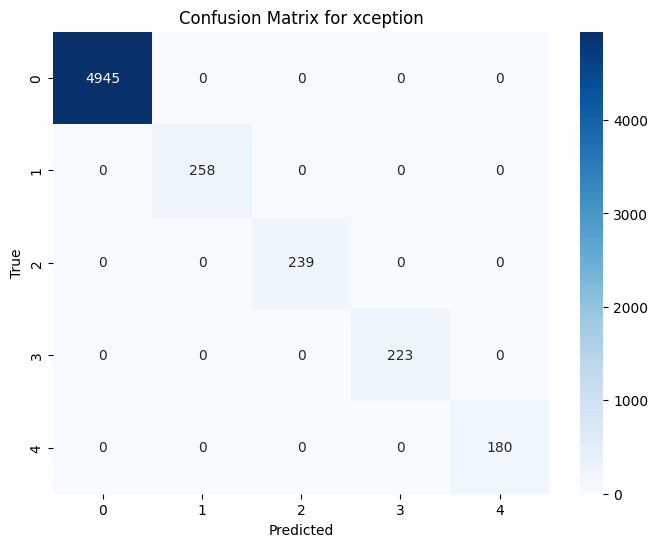

Classification Report for vgg16:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       0.93      1.00      0.96       258
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       223
           4       1.00      0.89      0.94       180

    accuracy                           1.00      5845
   macro avg       0.99      0.98      0.98      5845
weighted avg       1.00      1.00      1.00      5845



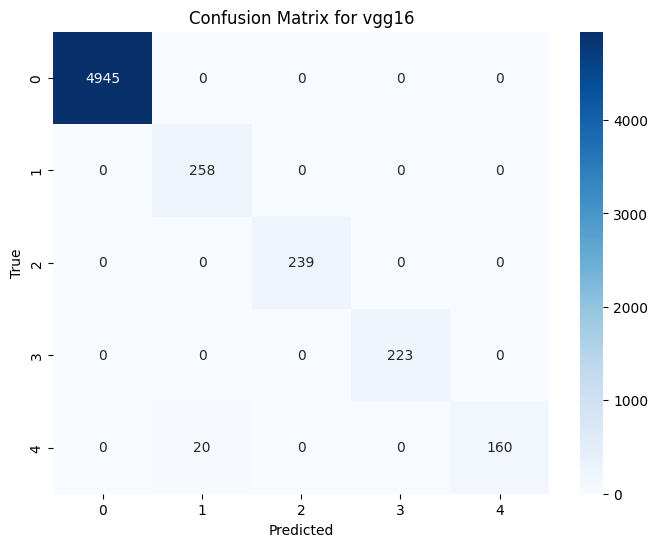

Classification Report for vgg19:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       1.00      1.00      1.00       258
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       223
           4       1.00      0.98      0.99       180

    accuracy                           1.00      5845
   macro avg       1.00      1.00      1.00      5845
weighted avg       1.00      1.00      1.00      5845



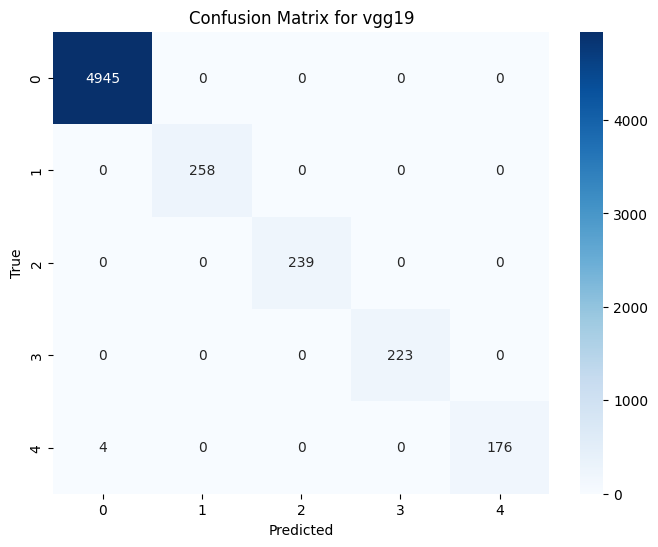

Classification Report for efficientnetb3:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4945
           1       0.00      0.00      0.00       258
           2       0.00      0.00      0.00       239
           3       0.00      0.00      0.00       223
           4       0.00      0.00      0.00       180

    accuracy                           0.85      5845
   macro avg       0.17      0.20      0.18      5845
weighted avg       0.72      0.85      0.78      5845



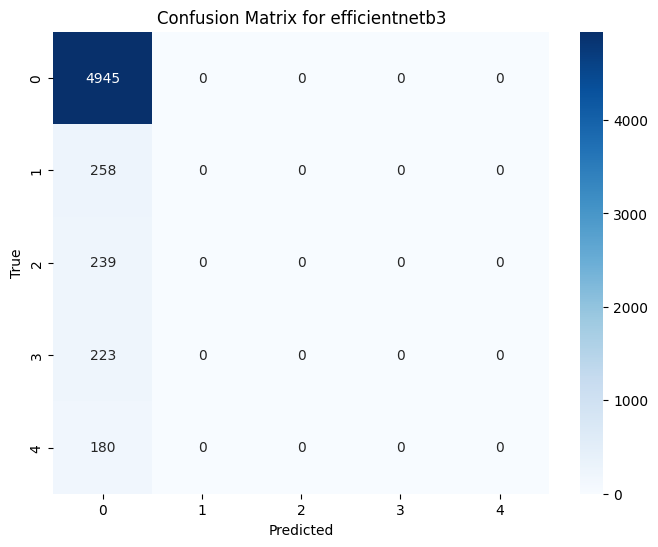

Classification Report for cnn_by_own:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       0.95      1.00      0.97       258
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       223
           4       1.00      0.92      0.96       180

    accuracy                           1.00      5845
   macro avg       0.99      0.98      0.99      5845
weighted avg       1.00      1.00      1.00      5845



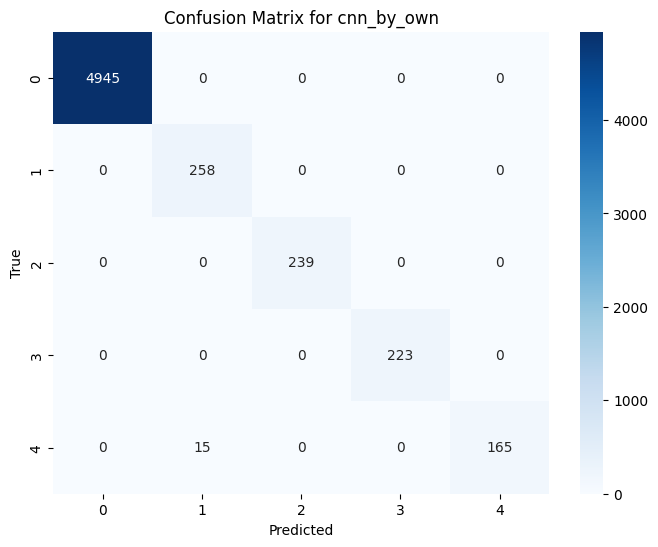

In [58]:
# Ensure you have the true labels from the validation set
true_labels = validation_generator.classes  # Load true labels

# Check the shapes
print(f"True labels shape: {len(true_labels)}")
for model_name, preds in predictions.items():
    print(f"{model_name} predictions shape: {len(preds)}")

# Generate classification reports and confusion matrices
for model_name, preds in predictions.items():
    if len(true_labels) == len(preds):  # Check for matching lengths
        print(f"Classification Report for {model_name}:")
        print(classification_report(true_labels, preds))

        # Confusion Matrix
        cm = confusion_matrix(true_labels, preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    else:
        print(f"Warning: Length mismatch for {model_name}: {len(true_labels)} vs {len(preds)}")
